In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("D:\Downloads\city_temperature.csv\city_temperature.csv",low_memory = False)
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [2]:
df.isna().sum()

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

In [3]:
df = df.drop('State',axis=1)
df.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,64.2
1,Africa,Algeria,Algiers,1,2,1995,49.4
2,Africa,Algeria,Algiers,1,3,1995,48.8
3,Africa,Algeria,Algiers,1,4,1995,46.4
4,Africa,Algeria,Algiers,1,5,1995,47.9


In [4]:
df.describe()

,Month,Day,Year,AvgTemperature
count,2.906327e+06,2.906327e+06,2.906327e+06,2.906327e+06
mean,6.469163e+00,1.571682e+01,2.006624e+03,5.600492e+01
std,3.456489e+00,8.800534e+00,2.338226e+01,3.212359e+01
min,1.000000e+00,0.000000e+00,2.000000e+02,-9.900000e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.550000e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


In [5]:
df['Year'].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020,  201,  200], dtype=int64)

In [6]:
a= df.groupby(['Year','Region'])['AvgTemperature'].mean().reset_index().sort_values(by='AvgTemperature',ascending=False)
a.head(20).style.background_gradient(cmap='Blues')

,Year,Region,AvgTemperature
179,2020,Africa,74.867798
113,2010,Middle East,74.841066
134,2013,Middle East,74.096354
169,2018,Middle East,73.461201
64,2003,Middle East,73.234932
106,2009,Middle East,72.982887
99,2008,Middle East,72.814018
50,2001,Middle East,72.698571
185,2020,South/Central America & Carribean,72.515579
148,2015,Middle East,72.165952


In [7]:
pip install --upgrade pandas seaborn

Note: you may need to restart the kernel to use updated packages.


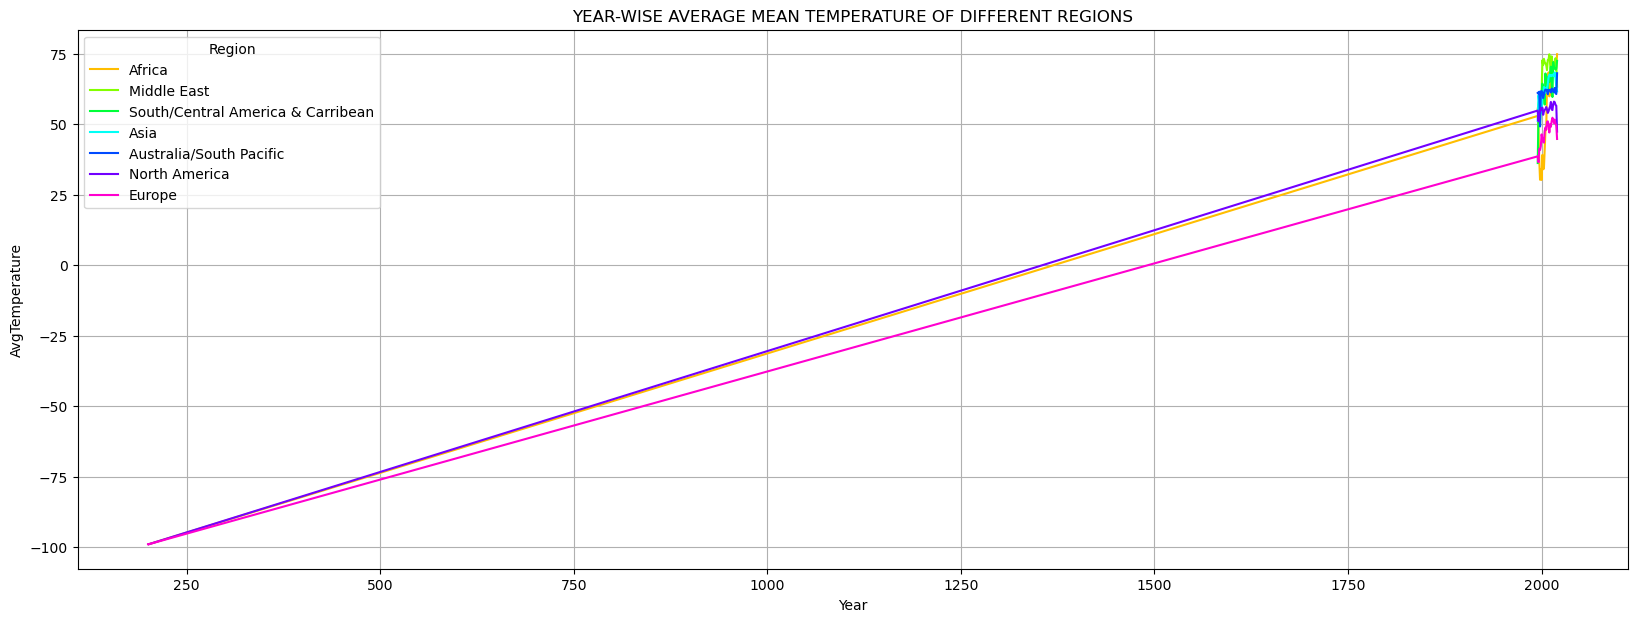

In [12]:
import seaborn as sns
plt.figure(figsize=(20,7))
sns.lineplot(x='Year',y='AvgTemperature',hue='Region',data=a,palette='hsv')
plt.grid()
plt.title('YEAR-WISE AVERAGE MEAN TEMPERATURE OF DIFFERENT REGIONS')
plt.show()

In [9]:
b= df.groupby(['Region','Month'])['AvgTemperature'].max().reset_index().sort_values(by='AvgTemperature',ascending=False)
b.head(20).style.background_gradient(cmap='Oranges')

,Region,Month,AvgTemperature
55,Middle East,8,110.000000
54,Middle East,7,109.900000
53,Middle East,6,109.900000
65,North America,6,107.700000
66,North America,7,107.500000
56,Middle East,9,106.900000
52,Middle East,5,104.900000
16,Asia,5,103.700000
17,Asia,6,103.600000
67,North America,8,103.500000


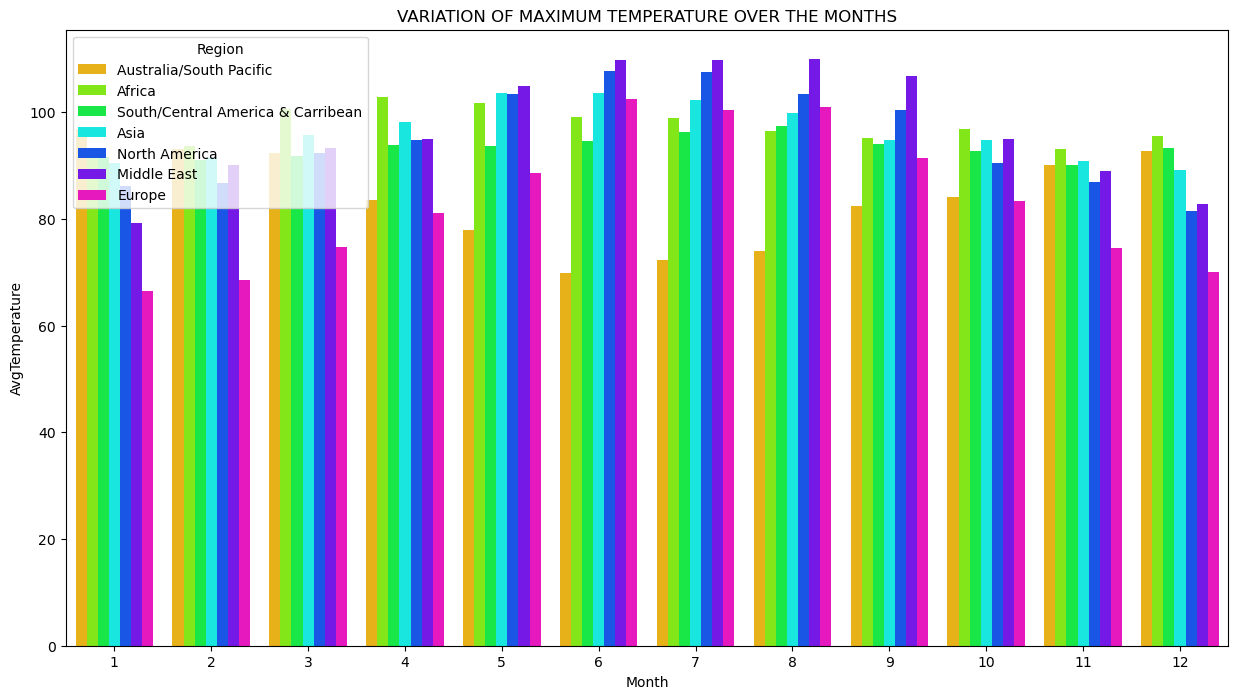

In [10]:
plt.figure(figsize=(15,8))
sns.barplot(x='Month', y= 'AvgTemperature',data=b,hue='Region',palette='hsv',saturation=.80)
plt.title('VARIATION OF MAXIMUM TEMPERATURE OVER THE MONTHS')
plt.show()

In [17]:
c= df.groupby(['Region','Year'])['AvgTemperature'].max().reset_index().sort_values(by='AvgTemperature',ascending=False)
c.head(20).style.background_gradient(cmap='Greens')

,Region,Year,AvgTemperature
124,Middle East,2012,110.000000
129,Middle East,2017,109.900000
127,Middle East,2015,109.900000
117,Middle East,2005,109.900000
122,Middle East,2010,109.700000
120,Middle East,2008,109.500000
125,Middle East,2013,109.400000
131,Middle East,2019,109.400000
112,Middle East,2000,109.200000
110,Middle East,1998,109.200000


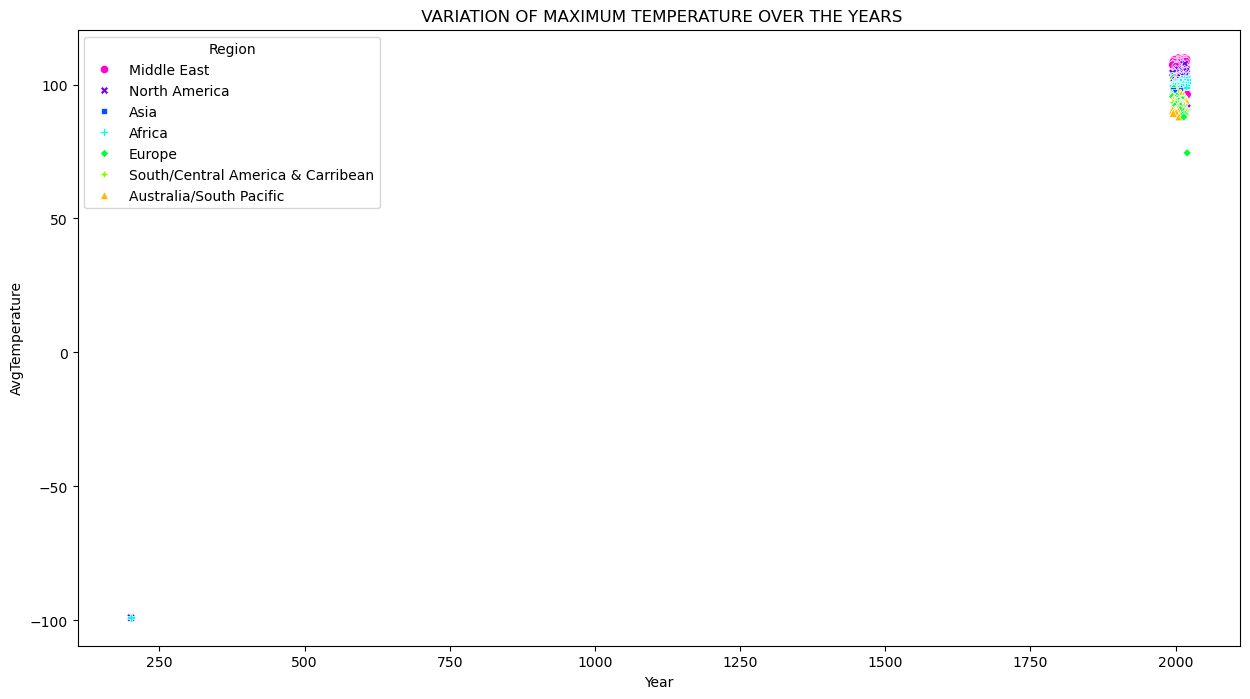

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Year',y='AvgTemperature',data=c,hue='Region',palette='hsv_r',style='Region')
plt.title(' VARIATION OF MAXIMUM TEMPERATURE OVER THE YEARS')
plt.show()

In [22]:
c= df.groupby(['Country','City'])['AvgTemperature'].mean().reset_index().sort_values(by='AvgTemperature',ascending=False).head(20)
c.style.background_gradient(cmap='Reds')

,Country,City,AvgTemperature
312,United Arab Emirates,Dubai,82.972631
75,India,Chennai (Madras),82.847021
122,Qatar,Doha,82.235625
311,United Arab Emirates,Abu Dhabi,82.192499
111,Nigeria,Niamey,81.951619
131,Singapore,Singapore,81.654403
119,Philippines,Manila,81.542424
73,India,Bombay (Mumbai),81.531729
10,Bahrain,Manama,80.635592
91,Laos,Vientiane,79.967462


C:\Users\gouth\AppData\Local\Temp\ipykernel_21728\2152933108.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AvgTemperature',y='City',data=c, palette='hsv_r',legend=False)


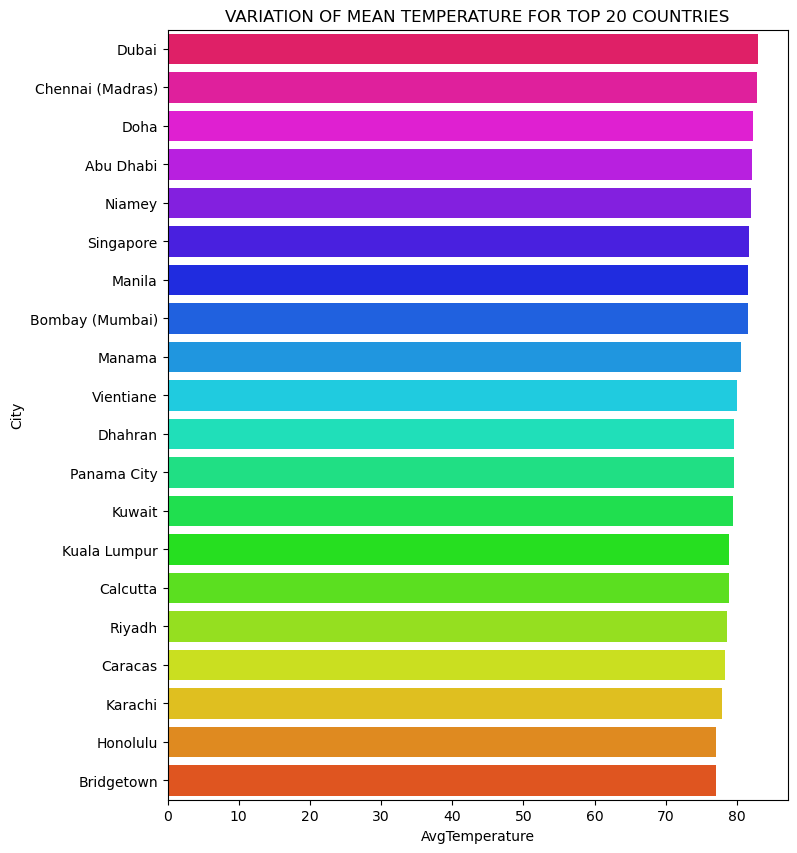

In [28]:
plt.figure(figsize=(8,10))
sns.barplot(x='AvgTemperature',y='City',data=c, palette='hsv_r',legend=False)
plt.title('VARIATION OF MEAN TEMPERATURE FOR TOP 20 COUNTRIES')
plt.show()

In [30]:
ind=df[df['Country']=='India']
x= ind.groupby(['Year'])['AvgTemperature'].mean().reset_index().sort_values(by='AvgTemperature',ascending=False)
x.style.background_gradient(cmap='hsv')

,Year,AvgTemperature
22,2017,81.482397
21,2016,80.834153
14,2009,80.759795
17,2012,80.667555
15,2010,80.558973
11,2006,80.505616
20,2015,80.453347
19,2014,80.247260
9,2004,80.204167
18,2013,80.076712


In [31]:
ind=df[df['Country']=='India']
x= ind.groupby(['City','Year'])['AvgTemperature'].max().reset_index().sort_values(by='AvgTemperature',ascending=False)
x.head(20).style.background_gradient(cmap='Blues')

,City,Year,AvgTemperature
81,Delhi,1998,103.700000
100,Delhi,2017,103.600000
78,Delhi,1995,102.900000
102,Delhi,2019,102.600000
95,Delhi,2012,102.500000
90,Delhi,2007,102.100000
93,Delhi,2010,101.800000
86,Delhi,2003,101.400000
92,Delhi,2009,101.400000
87,Delhi,2004,101.300000


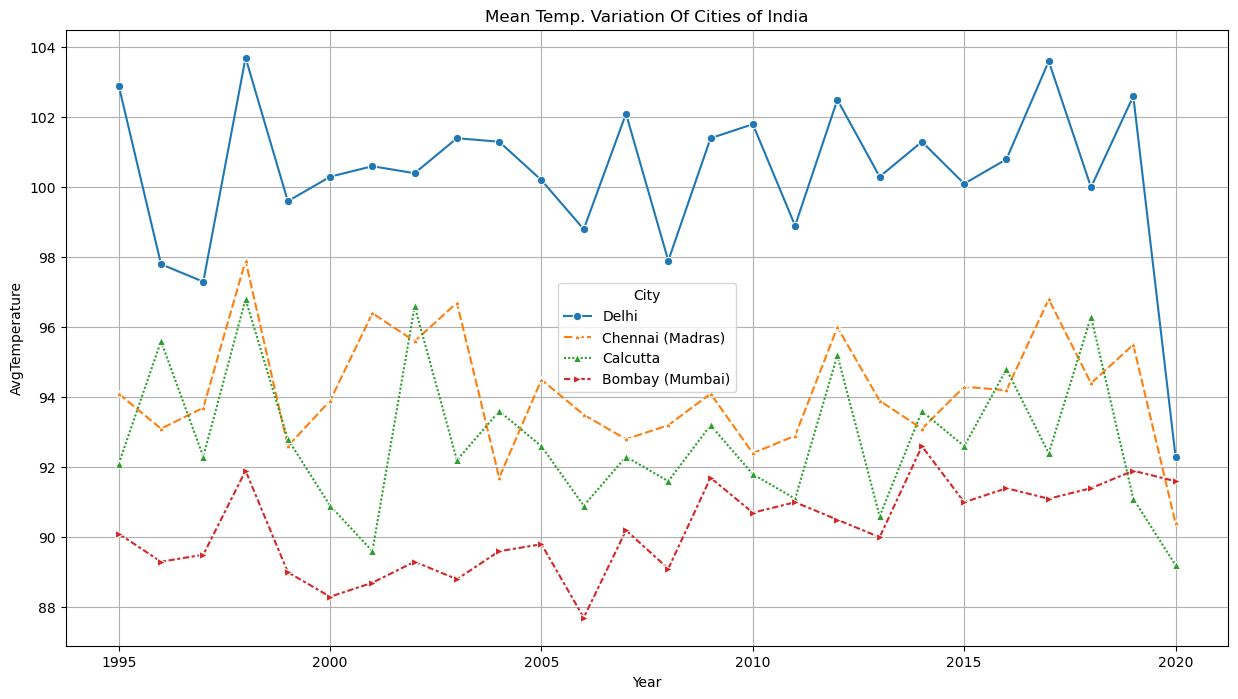

In [32]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Year',y='AvgTemperature',data=x,hue='City',style='City',markers=['o','*','^','>'])
plt.grid()
plt.title('Mean Temp. Variation Of Cities of India')
plt.show()

In [33]:
mask1=df['Country']=='India'
mask2=df['City']=='Delhi'

ind=df[mask1 & mask2 ]


y= ind.groupby(['Year','City','Month'])['AvgTemperature'].mean().reset_index().sort_values(by='AvgTemperature',ascending=False)
y.head(20).style.background_gradient(cmap='PiYG')

,Year,City,Month,AvgTemperature
209,2012,Delhi,6,97.056667
293,2019,Delhi,6,96.250000
5,1995,Delhi,6,95.830000
257,2016,Delhi,6,94.930000
233,2014,Delhi,6,94.750000
90,2002,Delhi,7,94.416129
184,2010,Delhi,5,94.348387
173,2009,Delhi,6,94.290000
185,2010,Delhi,6,93.916667
281,2018,Delhi,6,93.810000


C:\Users\gouth\AppData\Local\Temp\ipykernel_21728\1179737256.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year',y='AvgTemperature',data=y,palette='hsv_r')
C:\Users\gouth\AppData\Local\Temp\ipykernel_21728\1179737256.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month',y='AvgTemperature',data=y,palette='hsv')


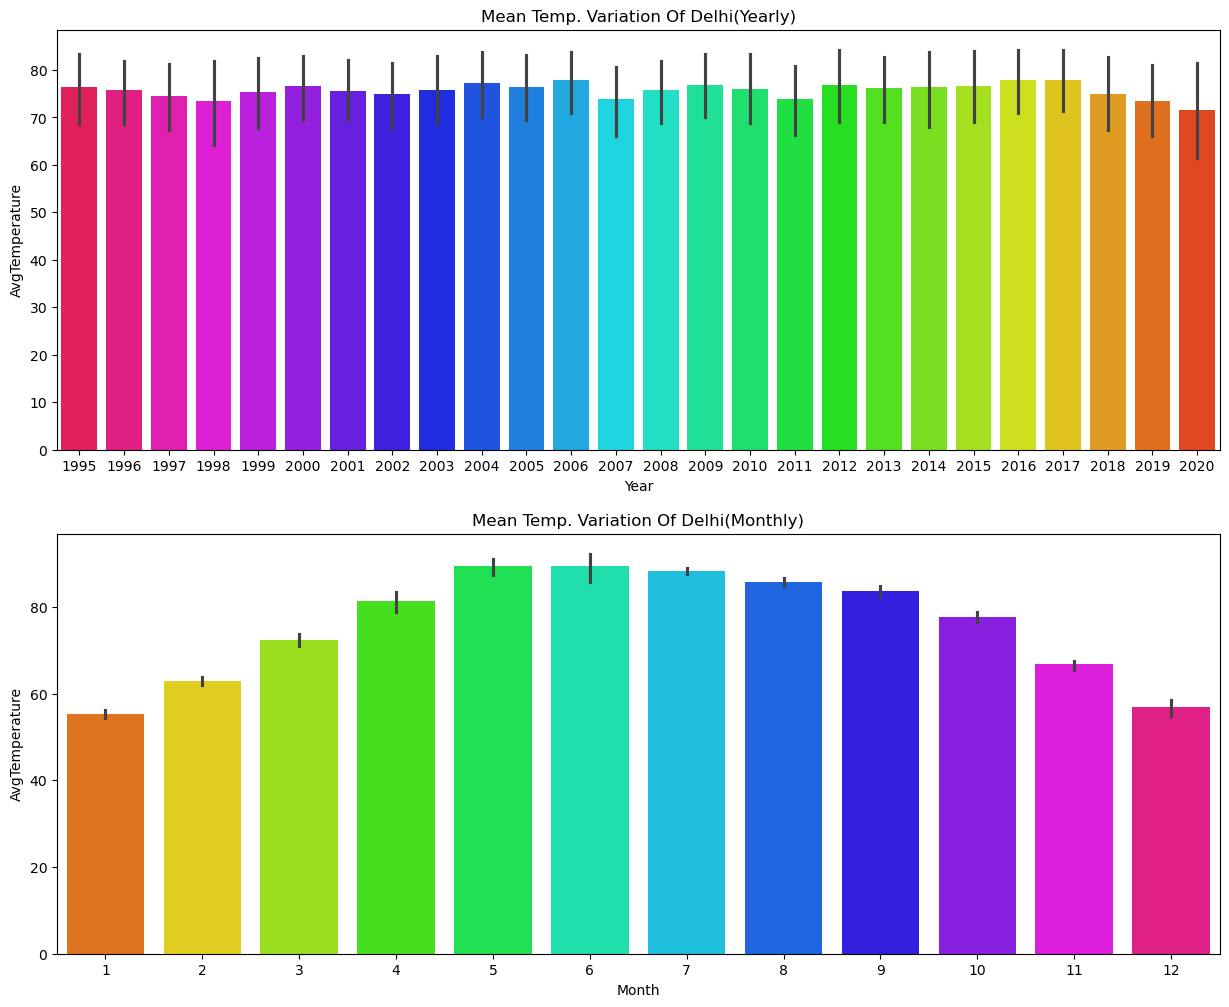

In [34]:
plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
sns.barplot(x='Year',y='AvgTemperature',data=y,palette='hsv_r')
plt.title('Mean Temp. Variation Of Delhi(Yearly)')

plt.subplot(2,1,2)
sns.barplot(x='Month',y='AvgTemperature',data=y,palette='hsv')
plt.title('Mean Temp. Variation Of Delhi(Monthly)')

plt.show()